<a href="https://colab.research.google.com/github/PriyankaSejwal/Bike-Sharing-Demand-Prediction/blob/main/PriyankaRimo_Bike_Sharing_Demand_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Seoul Bike Sharing Demand Prediction </u></b>

## <b> Problem Description </b>

### Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.


## <b> Data Description </b>

### <b> The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.</b>


### <b>Attribute Information: </b>

* ### Date : year-month-day
* ### Rented Bike count - Count of bikes rented at each hour
* ### Hour - Hour of he day
* ### Temperature-Temperature in Celsius
* ### Humidity - %
* ### Windspeed - m/s
* ### Visibility - 10m
* ### Dew point temperature - Celsius
* ### Solar radiation - MJ/m2
* ### Rainfall - mm
* ### Snowfall - cm
* ### Seasons - Winter, Spring, Summer, Autumn
* ### Holiday - Holiday/No holiday
* ### Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)

In [1]:
# importing necessary libraries
import pandas as pd
import numpy as np

# importing visualization libraries
import seaborn as sns
import matplotlib.pyplot as plt

# importing warnings
import warnings
warnings.filterwarnings('ignore')

# importing train_test_split
from sklearn.model_selection import train_test_split

# importing the algorithms
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor

# importing the evaluation metrics
from sklearn.metrics import r2_score, mean_squared_error

In [2]:
# mounting the drive

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# loading the dataset

bike = pd.read_csv('/content/drive/MyDrive/data file alma better/Capstone Project Regression/SeoulBikeData.csv', encoding = 'unicode_escape')

In [4]:
# reading the data

bike.head(5)

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [5]:
# checking the shape of the dataset

bike.shape

(8760, 14)

In [6]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

* We do not have any null-values in the dataset.
* There are six features of float datatype, four feature of integral datatype and four are of object datatype.
* Feature Date can be seen as object, we can convert it to datetime and work on it if required. 

In [7]:
# summary statistics for numerical features
bike.describe()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068
std,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000
75%,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000


## OBSERVATIONS
* Dependent Variable *Rented Bike Count* has mean ~ 704 and median ~ 504. Mean is higher than the median the feature is positively skewed. 
* Similarly features - *Visibility, Solar Radiation, Rainfall, Snowfall* have difference in mean and median, we can say these are skewed features.
* Feature - *Hour* on the other hand has similar values for mean and median so it follows a normal distribution.
* Feature *Temperature, Humidity, Windspeed,* also follow somewhat normal distribution.

In [8]:
# summary statistics for object type features

bike.describe(include='object').T

,count,unique,top,freq
Date,8760,365,01/12/2017,24
Seasons,8760,4,Spring,2208
Holiday,8760,2,No Holiday,8328
Functioning Day,8760,2,Yes,8465


## OBSERVATIONS

* Feature *Seasons* has four unique categories and frequently occuring is Spring with frequency 2208.
* Feature *Holiday* has two unique categories - Holiday and No Holiday. No holiday occurs 8328 times out of total 8760 obbservations.
* Feature *Functioning Day* has two unique categories - Yes and No with Yes occuring in 8465 observations times out of total 8760 observations.
* We will encode these three features- *Seasons, Holiday* and *Functioning Day* for better readability and making it suitable to fit to regression algorithm.
* Date can be used as a date time columns to retrive information out of it.

In [9]:
bike[bike.duplicated()]

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day


There are no duplicate observations in the dataset.

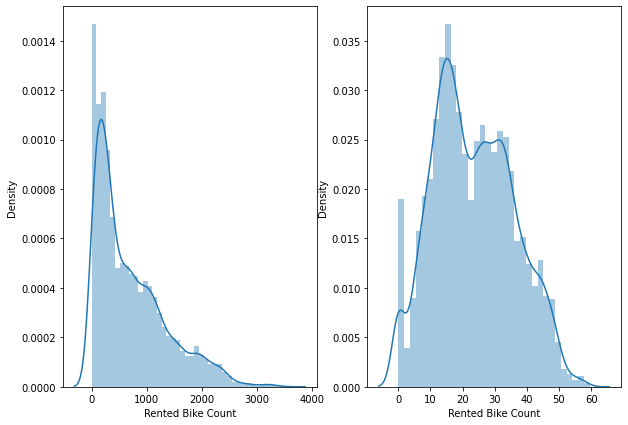

In [10]:
# distribution plot for the depedent variable 
fig,ax = plt.subplots(1,2, figsize=(10,7))
sns.distplot(bike['Rented Bike Count'], ax=ax[0])
sns.distplot(np.sqrt(bike['Rented Bike Count']), ax=ax[1])

The distribution of dependent variable was rightly skewed so we used square root method to see the changes in the distribution plot.

In [11]:
# Creating a copy of the dataset and adding some additional features using existing feature - Date.
df = bike.copy()

In [12]:
# Splitting the Date column into date month and year separately
df['dates'] = bike['Date'].str.split('/', expand=True)[0].astype('int')
df['month'] = bike['Date'].str.split('/', expand=True)[1].astype('int')
df['year'] = bike['Date'].str.split('/', expand=True)[2].astype('int')

In [13]:
df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,dates,month,year
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1,12,2017
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1,12,2017
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,1,12,2017
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1,12,2017
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1,12,2017


In [14]:
# Having the month name to make visualization more appealing.
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sept', 'Oct', 'Nov', 'Dec']
num_month = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
month_dict = dict(zip(num_month, months))
month_dict

{1: 'Jan',
 2: 'Feb',
 3: 'Mar',
 4: 'Apr',
 5: 'May',
 6: 'Jun',
 7: 'Jul',
 8: 'Aug',
 9: 'Sept',
 10: 'Oct',
 11: 'Nov',
 12: 'Dec'}

In [15]:
# applying the change 
df['Months'] = df['month'].map(month_dict)

In [16]:
df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,dates,month,year,Months
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1,12,2017,Dec
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1,12,2017,Dec
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,1,12,2017,Dec
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1,12,2017,Dec
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1,12,2017,Dec


## Visualizing Categorical Data

In [17]:
cat_col = [col for col in df.columns if df[col].dtypes=='O']
print(cat_col)

['Date', 'Seasons', 'Holiday', 'Functioning Day', 'Months']


Spring    2208
Summer    2208
Autumn    2184
Winter    2160
Name: Seasons, dtype: int64


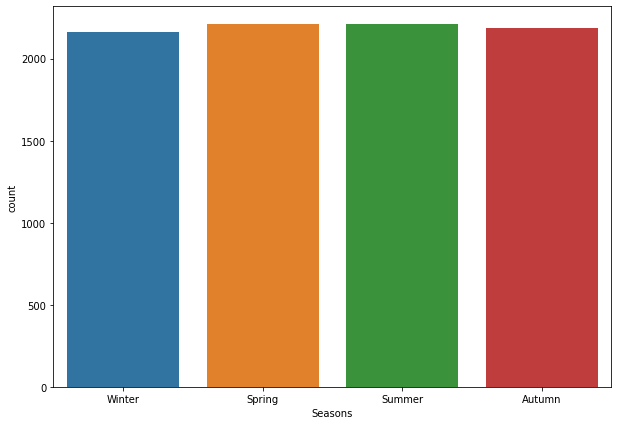

No Holiday    8328
Holiday        432
Name: Holiday, dtype: int64


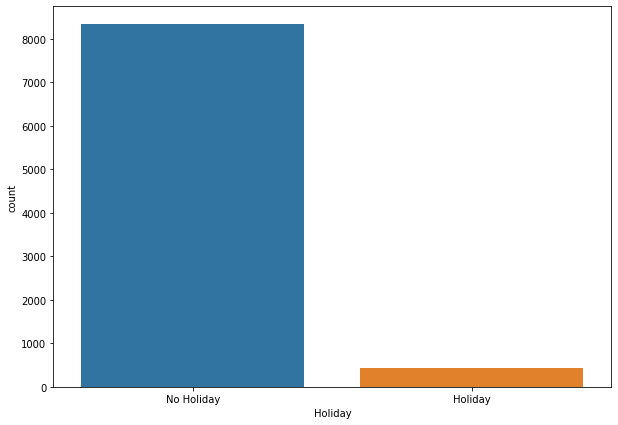

Yes    8465
No      295
Name: Functioning Day, dtype: int64


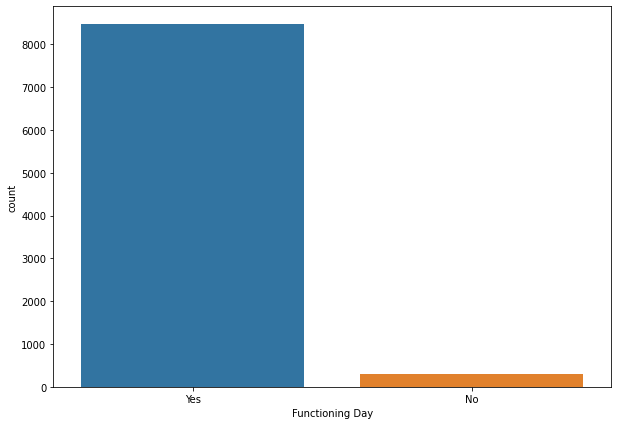

Dec     744
Jan     744
Mar     744
May     744
Jul     744
Aug     744
Oct     744
Apr     720
Jun     720
Sept    720
Nov     720
Feb     672
Name: Months, dtype: int64


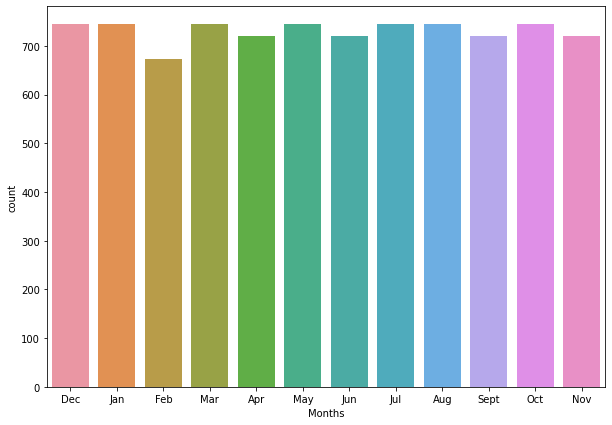

In [ ]:
for col in cat_col:
  if col!='Date':   # as date has many categories so visualization plot might not be much informative 
    plt.figure(figsize=(10,7))
    sns.countplot(df[col])
    print(df[col].value_counts())
    plt.show()

Text(0.5, 1.0, 'Rented Bike Counts in different Seasons')

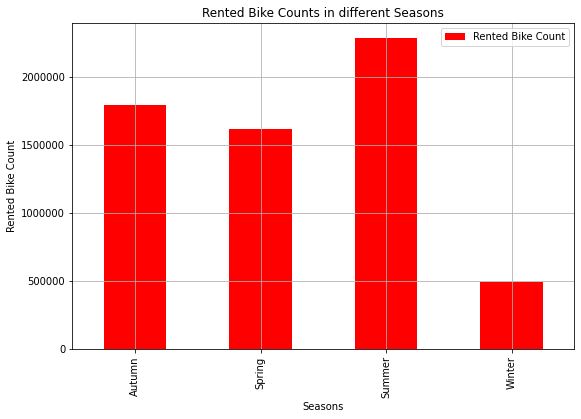

In [ ]:
plt.figure(figsize=(9,6))
df.groupby('Seasons')['Rented Bike Count'].sum().plot.bar(color='red', grid=True, legend=True)
plt.ticklabel_format(style='plain', axis='y')
plt.ylabel('Rented Bike Count')
plt.title('Rented Bike Counts in different Seasons')

### OBSERVATION:
People are more likely to rent a bike in Summer and least likely in winters.

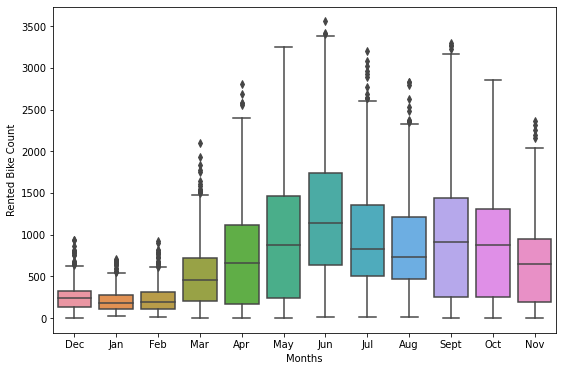

In [ ]:
# Demard of bikes in different months
plt.figure(figsize=(9,6))
sns.boxplot(df['Months'], df['Rented Bike Count'])

### <b> OBSERVATIONS:</b>
* December, January, February months have a quite lesser demand.
* June has the highest demand.
* May, June has the highest demand followed by September, October.
* December, January, February are the cold months as demand is lowest in these months and Winter season.
* We can say that summer season fall around in may june as summers had a highest demand.
* September, October might be the fall/ autumn months as they see the second highets demand.

<b> Rented bike demand on functioning days and holidays



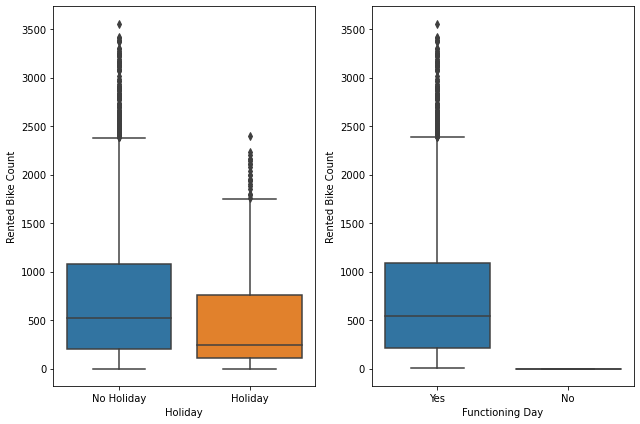

In [ ]:
fig, ax = plt.subplots(1,2, figsize=(9,6))
sns.boxplot(df['Holiday'], df['Rented Bike Count'], ax=ax[0])
sns.boxplot(df['Functioning Day'], df['Rented Bike Count'], ax=ax[1])
plt.tight_layout()

### <b> OBSERVATIONS </b>

* Bikes are in higher demand for a No-Holiday and a Functioning Day.
* Average 500 bikes are in demand per day for a No Holiday and a Functioning day. 